In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:

# Step 1: Load the Dataset
df = pd.read_csv('sales_data.csv')


In [6]:

# Step 2: Data Preprocessing
# Drop non-numeric columns (e.g., 'Customer ID', 'Customer Gender') for clustering
df = df.drop(columns=['CustomerID', 'Gender'])


In [7]:

# Check for missing values
df.dropna(inplace=True)


In [8]:

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [9]:

# Step 3: Determine Optimal Number of Clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


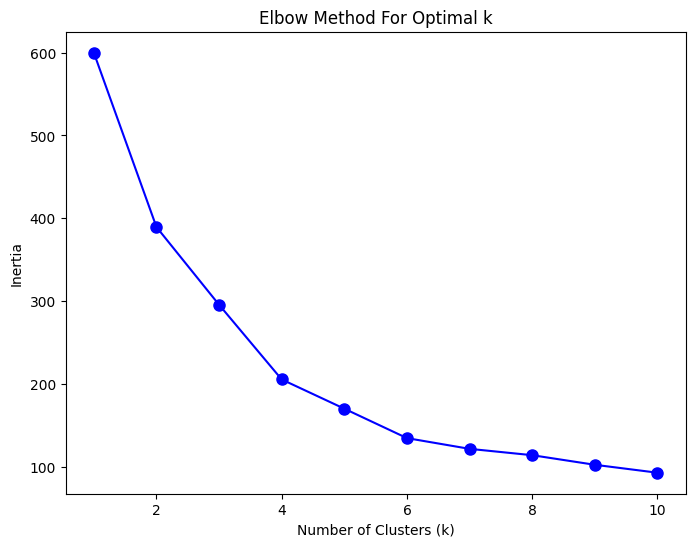

In [10]:

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [11]:

# Step 4: Fit KMeans with the optimal number of clusters (based on elbow method)
# Assuming optimal k = 4 from elbow plot (adjust based on actual plot)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


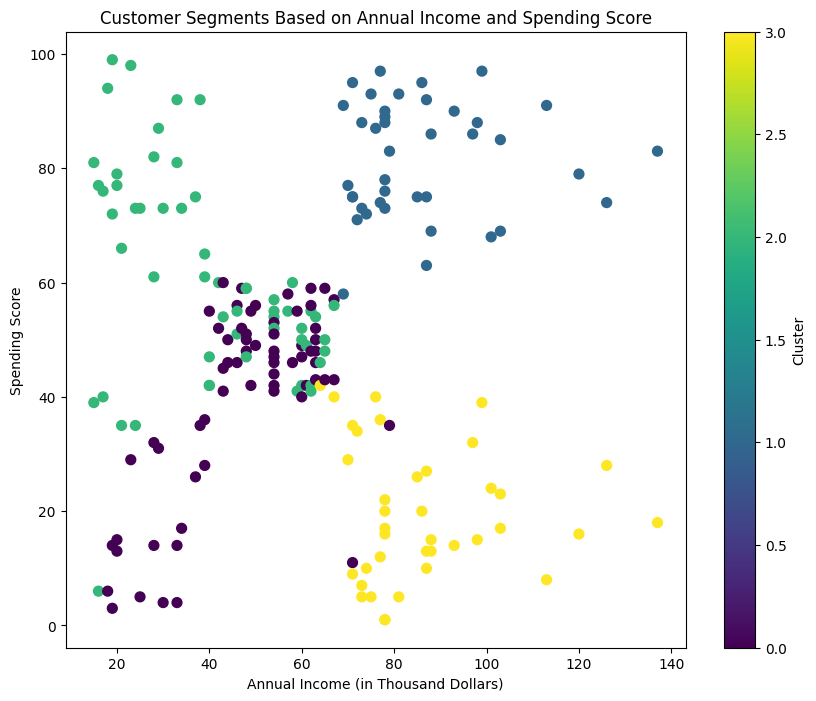

In [18]:

# Step 5: Visualize the Clusters
plt.figure(figsize=(10, 8))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income (in Thousand Dollars)')
plt.ylabel('Spending Score')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.colorbar(label='Cluster')
plt.show()
